In [50]:
all_csv_path = 'Matmul_Physical_Results\\'

In [51]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
plt.rcParams.update({'figure.max_open_warning': 0})
from IPython.display import display, HTML

In [52]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

mpl.rc('font', **font)

In [53]:
import os
ls_all_csv = os.listdir(all_csv_path)

In [54]:
ls_all_csv

['matmul_physical_60_40.csv',
 'matmul_physical_70_30.csv',
 'matmul_physical_80_20.csv']

In [55]:
def return_df(df, file, val):
    ls = ['best_svr', 'best_lr', 'best_rr', 'best_knn', 'best_gpr','best_dt','best_rf','best_etr',
          'best_gbr', 'best_xgb', 'dnn_1', 'dnn_2', 'dnn_3', 'dnn_4']
    # ,'dnn_1', 'dnn_2', 'dnn_3', 'dnn_4'
    new_df = pd.DataFrame(columns = ls) 
    for i in range(len(ls)):
        arr = [float(s) for s in df[val][i][1:-1].split(',')]
        new_df[ls[i]] = arr
    return new_df

# R2 Score

In [56]:
df_set_r2 = [] 
for file in ls_all_csv:
    df = pd.read_csv(all_csv_path + '/' + file)
    df_set_r2.append(return_df(df, file, val = 'r2'))

In [57]:
df_set_mape = [] 
for file in ls_all_csv:
    df = pd.read_csv(all_csv_path + '/' + file)
    df_set_mape.append(return_df(df, file, val = 'mape'))

In [58]:
df_set_mse = [] 
for file in ls_all_csv:
    df = pd.read_csv(all_csv_path + '/' + file)
    # print(df.head())
    # break
    df_set_mse.append(return_df(df, file, val = 'mse'))

In [59]:
len(df_set_mape)

3

In [60]:
def find_y_r2(df):
    y = []
    for i in range(len(df.columns)):
        y_temp = df[df.columns[i]].tolist()
        y.append(np.mean(y_temp))
    # print(y)    
    return y

In [61]:
def find_y_mape(df):
    y = []
    for i in range(len(df.columns)):
        y_temp = df[df.columns[i]].tolist()
        y_temp = [x * 100 for x in y_temp]
        #print(y_temp)
        y.append(np.median(y_temp))
        # y.append(y_temp)
    # print(y)    
    return y

In [62]:
def find_y_mse(df):
    y = []
    for i in range(len(df.columns)):
        y_temp = df[df.columns[i]].tolist()
        # y_temp = [x * 100 for x in y_temp]
        #print(y_temp)
        y.append(np.mean(y_temp))
        # y.append(y_temp)
    # print(y)    
    return y

In [63]:
cbmb = [0,1,2]
cb = cbmb
mb =  cbmb
dataset_names = ls_all_csv

In [64]:
ls_all_csv

['matmul_physical_60_40.csv',
 'matmul_physical_70_30.csv',
 'matmul_physical_80_20.csv']

# Mean R2 and Median APE values for all models

# Commpute Bound Fig 2

In [65]:
sum_r2 = 0
for j in range(len(cbmb)):
    color = 'tab:red'
    y_r2 = find_y_r2(df_set_r2[cb[j]])
    print('Mean R2 Values for dataset:', dataset_names[cbmb[j]], np.mean(y_r2[5:10]),  '\n')
    sum_r2 = sum_r2 + np.mean(y_r2[5:10])
    # y_mape = find_y_mape(df_set_mape[cb[j]])
    # print('Median Values for dataset:', dataset_names[cb[j]],y_mape,  '\n')
print(sum_r2/5)    

Mean R2 Values for dataset: matmul_physical_60_40.csv 0.974962881805672 

Mean R2 Values for dataset: matmul_physical_70_30.csv 0.9852353258793537 

Mean R2 Values for dataset: matmul_physical_80_20.csv 0.9872064743733798 

0.5894809364116811


In [66]:
sum_mape = 0
for j in range(len(cb)):
    color = 'tab:red'
    y_mape = find_y_mape(df_set_mape[cb[j]])
    print('Mean R2 Values for dataset:', dataset_names[cb[j]], np.mean(y_mape[5:10]),  '\n')
    sum_mape = sum_mape + np.mean(y_mape[5:10])
    # y_mape = find_y_mape(df_set_mape[cb[j]])
    # print('Median Values for dataset:', dataset_names[cb[j]],y_mape,  '\n')
print(sum_mape/5)    

Mean R2 Values for dataset: matmul_physical_60_40.csv 4.6161939517023995 

Mean R2 Values for dataset: matmul_physical_70_30.csv 3.89024543601759 

Mean R2 Values for dataset: matmul_physical_80_20.csv 3.526625333634203 

2.406612944270839


In [67]:
y_mape

[69.82490230103822,
 41.20631341670857,
 40.18942569608832,
 3.611497700172004,
 30.578077135266824,
 4.880601972984634,
 2.452826044538164,
 0.33983782542156493,
 5.082939230838545,
 4.87692159438811,
 57.823775,
 13.1162975,
 29.089259,
 25.0373825]

In [68]:
y_r2

[-0.07009686714473792,
 0.7652223231226121,
 0.7848582089000076,
 0.9863557536676175,
 0.8343150060468464,
 0.9775673859487626,
 0.9965636731351701,
 0.9998510048031758,
 0.97124556124247,
 0.9908047467373207,
 -0.04133382772114651,
 0.9616455519511649,
 0.36998092766884616,
 0.2975881837732691]

In [69]:
ls_all_csv

['matmul_physical_60_40.csv',
 'matmul_physical_70_30.csv',
 'matmul_physical_80_20.csv']

C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


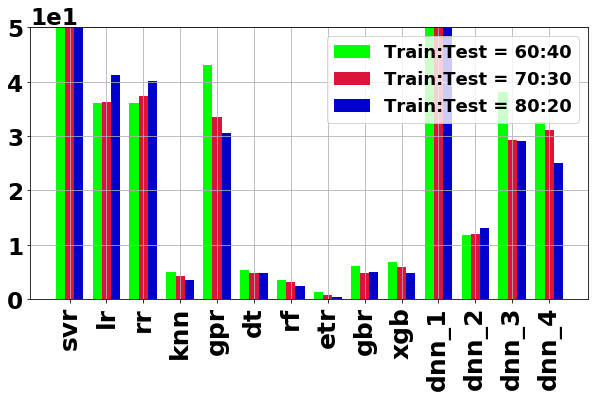

In [71]:
ls_temp = ['svr', 'lr', 'rr', 'knn', 'gpr','dt','rf','etr',
          'gbr', 'xgb' ,'dnn_1', 'dnn_2', 'dnn_3', 'dnn_4']
# fig, ax = plt.subplots(1,1, figsize = (10, 7)) # create 2x2 array of subplots
k = 0
dataset = ['d1','d2','d3']
dataset_names = ls_all_csv
y_r2_60 = find_y_r2(df_set_r2[0])
y_mape_60 = find_y_mape(df_set_mape[0])
y_r2_70 = find_y_r2(df_set_r2[1])
y_mape_70 = find_y_mape(df_set_mape[1])
y_r2_80 = find_y_r2(df_set_r2[2])
y_mape_80 = find_y_mape(df_set_mape[2])

# ls_temp = ['lr', 'rr', 'knn','gpr','dt','rf','etr','dnn']
ls = np.arange(0,14)
fig, ax = plt.subplots(1,1, figsize = (10, 5)) # create 2x2 array of subplots

bar1 = ax.bar(ls-0.25,y_mape_60, width = 0.25,color = 'lime', label = 'Train:Test = 60:40', align = 'center')
bar2 = ax.bar(ls,y_mape_70, width = 0.25, color = 'crimson', label = 'Train:Test = 70:30', align = 'center')
bar3 = ax.bar(ls+0.25,y_mape_80, width = 0.25, color = 'mediumblue', label = 'Train:Test = 80:20', align = 'center')
ax.set_ylim(0,50)
ax.set_xticks(ls)
ax.set_xticklabels(ls_temp, rotation = 90, fontsize = 25)
ax.legend(frameon= True, loc='upper right', prop={'size': 18})
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.title('MedAPE')
ax.grid()
# ax.autoscale(tight=True)

plt.rc('font', size = 23)

fig.show()

plt.savefig('matmul_physical_pareto.eps', bbox_inches = 'tight')